In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [106]:
file_path = "dataset.csv"

In [107]:
df = pd.read_csv(file_path, delimiter=';')
df.head()

,arrayType,sortMethod,arraySize,duration,comparisons
0,unsorted,std_quicksort,100,28,802
1,unsorted,std_mergesort,100,19,1231
2,unsorted,string_quicksort,100,322,1231
3,unsorted,string_mergesort,100,110,1635
4,unsorted,msd_radix_sort,100,352,1635


In [108]:
df.describe()

,arraySize,duration,comparisons
count,540.000000,540.000000,540.000000
mean,1550.000000,18663.318519,46090.448148
std,866.346689,52071.198479,30995.272299
min,100.000000,19.000000,802.000000
25%,800.000000,552.000000,19910.000000
50%,1550.000000,1580.500000,41456.000000
75%,2300.000000,4998.000000,68704.000000
max,3000.000000,315590.000000,119833.000000


### График среднего количества сравнений по методам сортировки

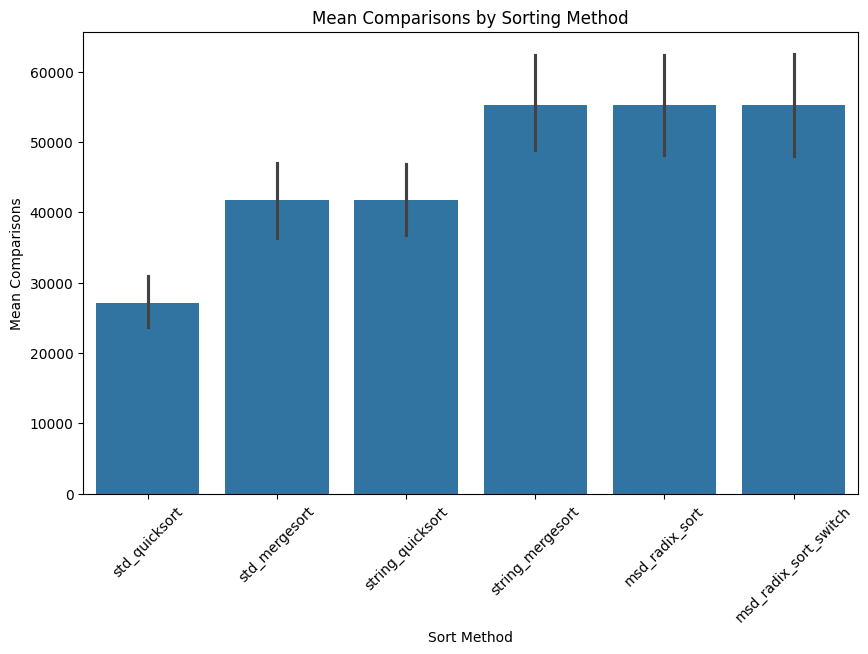

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sortMethod', y='comparisons', estimator=np.mean)
plt.title('Mean Comparisons by Sorting Method')
plt.xlabel('Sort Method')
plt.ylabel('Mean Comparisons')
plt.xticks(rotation=45)
plt.show()

### График распределения времени выполнения сортировки по типу массива и методу сортировки

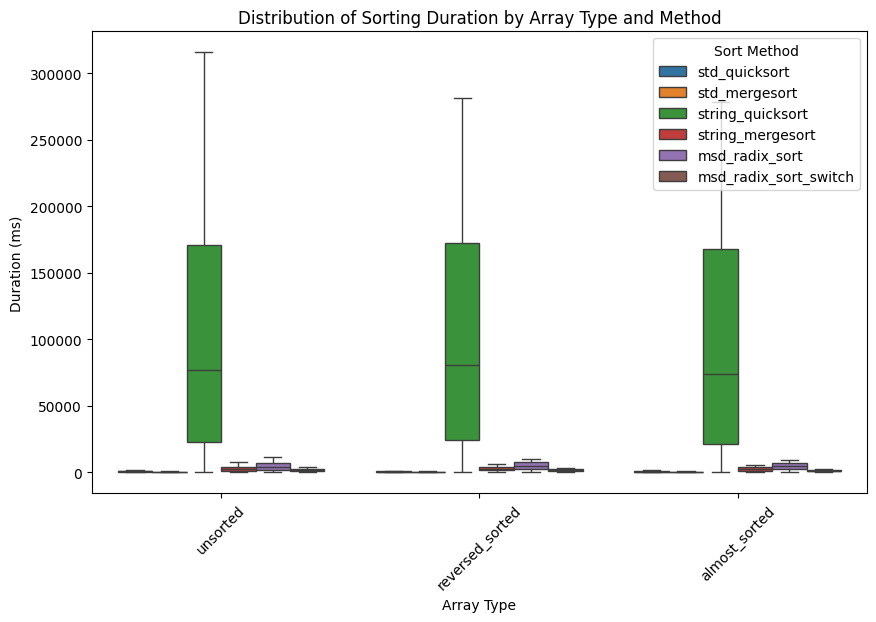

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='arrayType', y='duration', hue='sortMethod')
plt.title('Distribution of Sorting Duration by Array Type and Method')
plt.xlabel('Array Type')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.legend(title='Sort Method')
plt.show()

### График среднего времени выполнения сортировки по размеру массива для каждого метода

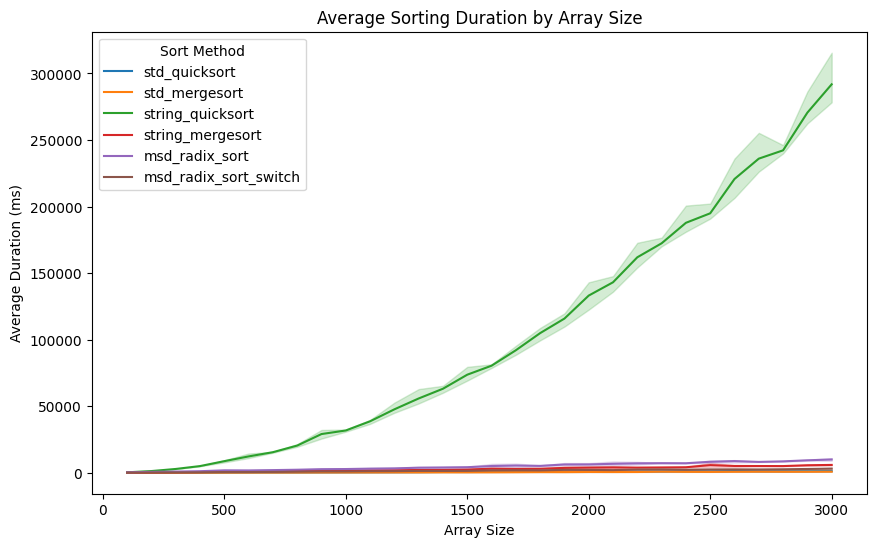

In [111]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arraySize', y='duration', hue='sortMethod')
plt.title('Average Sorting Duration by Array Size')
plt.xlabel('Array Size')
plt.ylabel('Average Duration (ms)')
plt.legend(title='Sort Method')
plt.show()

### Графики среднего времени выполнения сортировки по размеру массива для каждого метода (groupby arrayType)

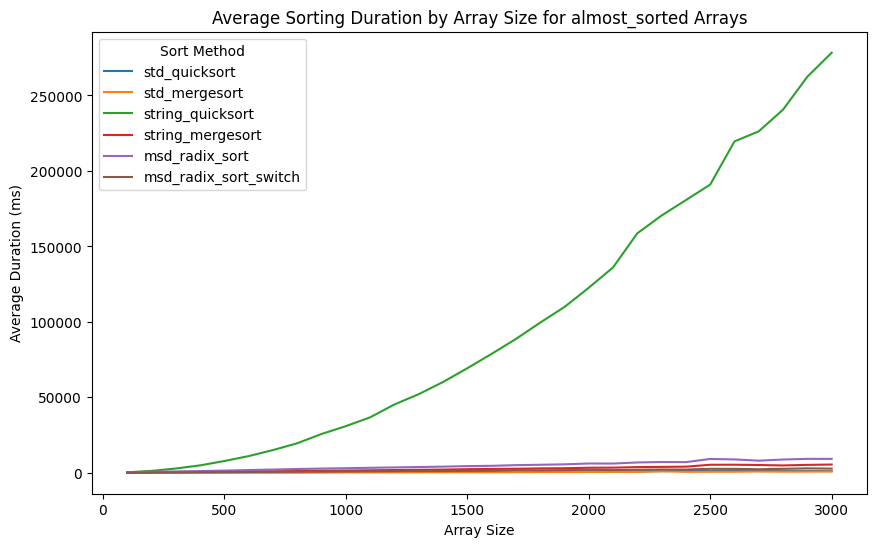

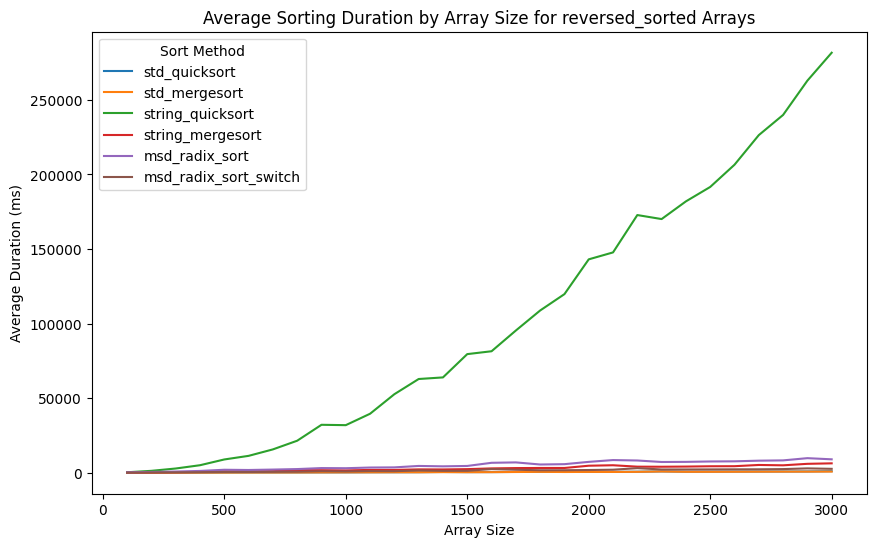

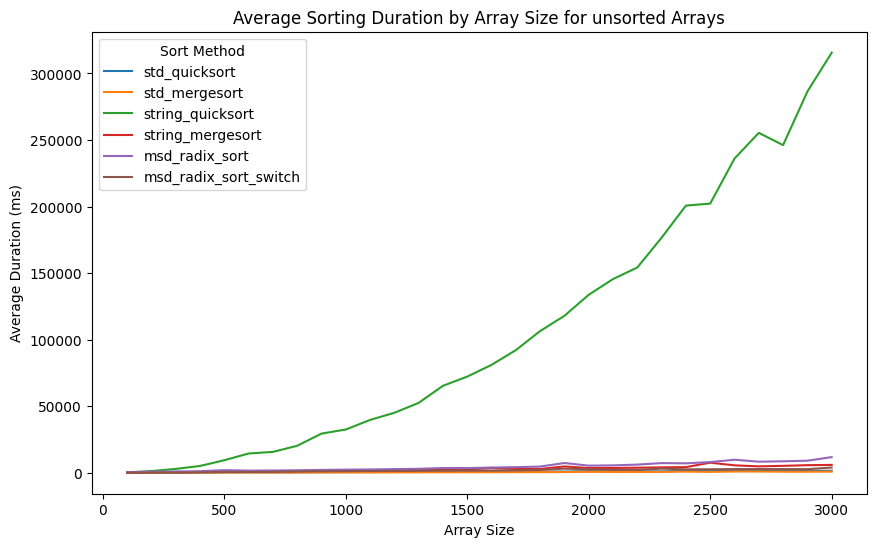

In [112]:
# Группировка данных по типу массива
grouped_by_array = df.groupby('arrayType')

# Построение графиков для каждого типа массива
for array_type, data in grouped_by_array:
    plt.figure(figsize=(10, 6))

    # График среднего времени выполнения сортировки по размеру массива для каждого метода
    sns.lineplot(data=data, x='arraySize', y='duration', hue='sortMethod')
    plt.title(f'Average Sorting Duration by Array Size for {array_type} Arrays')
    plt.xlabel('Array Size')
    plt.ylabel('Average Duration (ms)')
    plt.legend(title='Sort Method')
    plt.show()

### График среднего количества сравнений по размеру массива для каждого метода

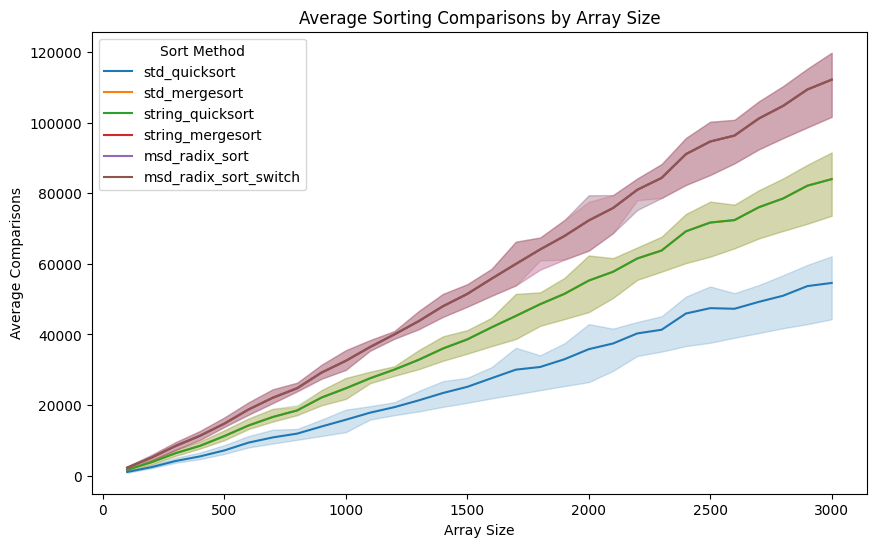

In [113]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='arraySize', y='comparisons', hue='sortMethod')
plt.title('Average Sorting Comparisons by Array Size')
plt.xlabel('Array Size')
plt.ylabel('Average Comparisons')
plt.legend(title='Sort Method')
plt.show()

### Графики среднего числа выполнения сравнений по размеру массива для каждого метода (groupby arrayType)

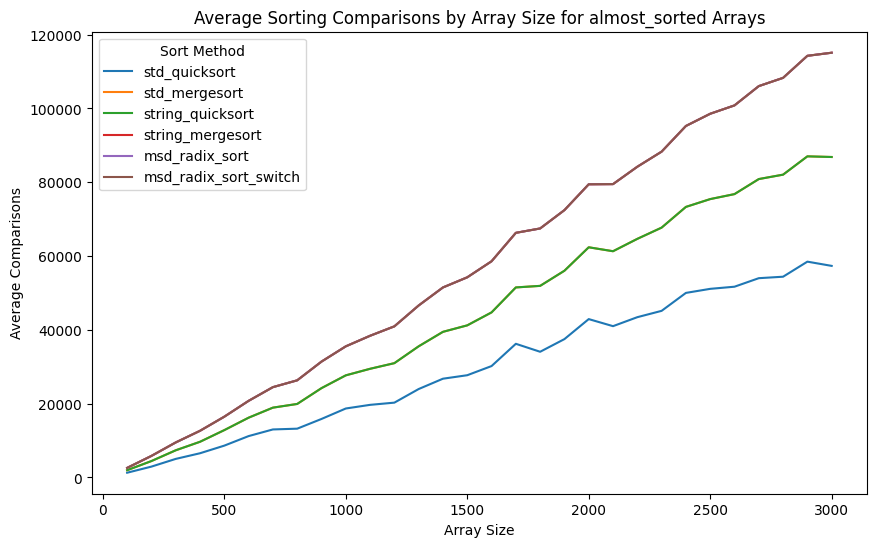

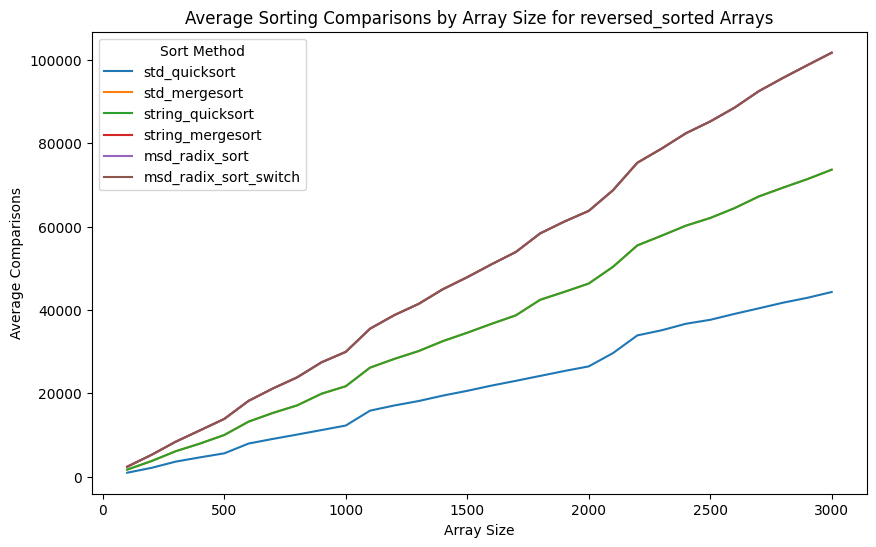

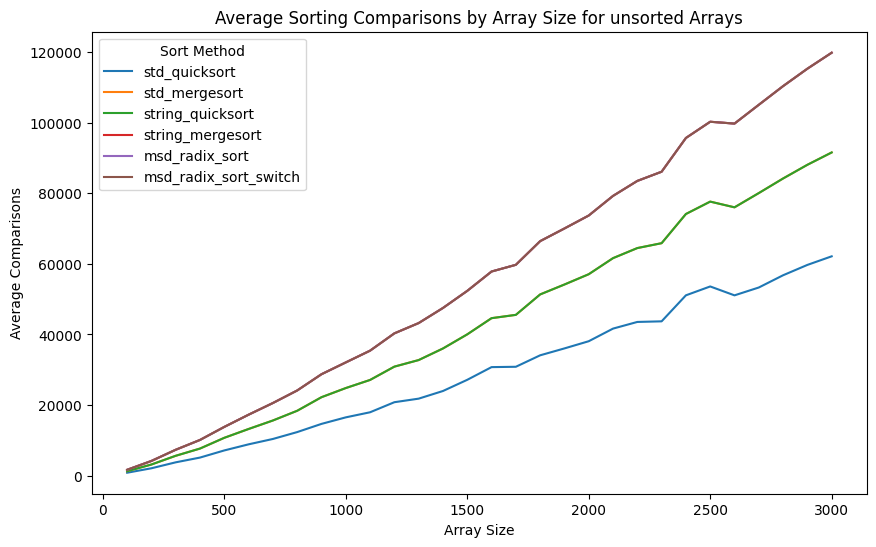

In [114]:
# Группировка данных по типу массива
grouped_by_array = df.groupby('arrayType')

# Построение графиков для каждого типа массива
for array_type, data in grouped_by_array:
    plt.figure(figsize=(10, 6))

    # График среднего времени выполнения сортировки по размеру массива для каждого метода
    sns.lineplot(data=data, x='arraySize', y='comparisons', hue='sortMethod')
    plt.title(f'Average Sorting Comparisons by Array Size for {array_type} Arrays')
    plt.xlabel('Array Size')
    plt.ylabel('Average Comparisons')
    plt.legend(title='Sort Method')
    plt.show()

## Выводы по результатам проведенного эмпирического анализа

### [Сортировка строк: Обзор алгоритмов и их временная сложность](https://www.cs.helsinki.fi/u/tpkarkka/opetus/13s/spa/lecture03-2x4.pdf)

#### String Quicksort (Multikey Quicksort)
Это один из самых быстрых алгоритмов сортировки для общего назначения на практике. Алгоритм разбивает входные данные на части. Временная сложность зависит от выбора опорного элемента и составляет O(ΣLCP(R) + n log n).

#### String Mergesort
Общие алгоритмы сортировки, основанные на сравнении, не всегда эффективны для сортировки строк из-за того, что сравнение строк может быть неэффективным. Они могут потреблять много времени, но возвращать лишь небольшую часть полезной информации.

Быстрая сортировка строк решает эту проблему, обрабатывая информацию сразу после сравнения каждого символа. Это позволяет использовать полученные данные более эффективно.

Сортировка строк слиянием использует противоположный подход. Вместо стандартного сравнения строк она заменяет его на lcp-сравнение, где lcp (самый длинный общий префикс) играет ключевую роль. При таком сравнении возвращается пара значений: порядок и длина самого длинного общего префикса. Это дополнительная информация компенсирует дополнительное время, затраченное на сравнение.

Временная сложность: O(ΣLCP(R) + n log n).

#### Radix Sort (LSD Radix Sort)
Radix sort применяется для сортировки больших целых чисел, но его можно использовать и для сортировки строк, рассматривая их как строки цифр. Временная сложность LSD Radix Sort составляет O(||R|| + mσ), где ||R|| - общая длина строк в R, а m - длина самой длинной строки в R.

#### MSD Radix Sort
Этот алгоритм похож на String Quicksort, но разбивает строки на σ частей. Временная сложность MSD Radix Sort составляет O(ΣLCP(R) + n log σ), что делает его быстрым и оптимальным для строковой сортировки.